In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
# Set path 
csv_path = 'all_movie_data/all_movie_data.csv'

# Read csv
movie_data_df = pd.read_csv(csv_path)
movie_data_df.head()

,title,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
0,#Jìyìdàshi,Thriller/Suspense,20170428,R,0.0,20000000,224942,587470,43326383,0.011247,-2.898292,-0.523493,-0.581893,-4.585571,NaN,0
1,#TylerPerrysBoo2AMadeaHalloween,Comedy,20171020,PG-13,0.0,20000000,21226953,47319572,47879572,1.061348,-2.898292,-0.523493,0.033620,-3.354543,NaN,0
2,#Gongfuyujia,Action,20170127,PG,0.0,65000000,111979,362657,254569616,0.001723,-2.898292,0.237558,-0.585204,-3.831142,NaN,0
3,#TheEmojiMovie,Adventure,20170728,PG,17.0,50000000,24531923,86089513,216807482,0.490638,-2.055509,-0.016126,0.130480,-1.810674,0.037363,81
4,#JustGettingStarted,Comedy,20171208,PG-13,22.0,22000000,3201459,6069605,6709821,0.145521,-1.807632,-0.489668,-0.494660,-3.286619,0.305133,100


In [9]:
# Subset df with tweet counts greater than 10
movie_data_df = movie_data_df.loc[(movie_data_df['tweet_count'])>10]
movie_data_df.head()

,title,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
3,#TheEmojiMovie,Adventure,20170728,PG,17.00,50000000,24531923,86089513,216807482,0.490638,-2.055509,-0.016126,0.130480,-1.810674,0.037363,81
4,#JustGettingStarted,Comedy,20171208,PG-13,22.00,22000000,3201459,6069605,6709821,0.145521,-1.807632,-0.489668,-0.494660,-3.286619,0.305133,100
5,#Rings,Horror,20170203,PG-13,25.67,25000000,13002632,27793018,82991460,0.520105,-1.625690,-0.438931,-0.207413,-2.479447,0.310344,78
6,#TheSnowman,Thriller/Suspense,20171020,R,27.00,35000000,3372565,6670765,43232849,0.096359,-1.559755,-0.269809,-0.489645,-2.808854,0.206885,100
7,#Geostorm,Action,20171020,PG-13,29.33,100000000,13707376,33700160,220800160,0.137074,-1.444244,0.829486,-0.186759,-0.988276,0.001510,100


In [10]:
# Index by title
title_index_df = movie_data_df.set_index(['title'])
title_index_df.head()

,genre,release,rated,value,budget,opening,domestic,worldwide,ratio,zrating,zbudget,zopening,ztotal,compound,tweet_count
title,,,,,,,,,,,,,,,
#TheEmojiMovie,Adventure,20170728,PG,17.00,50000000,24531923,86089513,216807482,0.490638,-2.055509,-0.016126,0.130480,-1.810674,0.037363,81
#JustGettingStarted,Comedy,20171208,PG-13,22.00,22000000,3201459,6069605,6709821,0.145521,-1.807632,-0.489668,-0.494660,-3.286619,0.305133,100
#Rings,Horror,20170203,PG-13,25.67,25000000,13002632,27793018,82991460,0.520105,-1.625690,-0.438931,-0.207413,-2.479447,0.310344,78
#TheSnowman,Thriller/Suspense,20171020,R,27.00,35000000,3372565,6670765,43232849,0.096359,-1.559755,-0.269809,-0.489645,-2.808854,0.206885,100
#Geostorm,Action,20171020,PG-13,29.33,100000000,13707376,33700160,220800160,0.137074,-1.444244,0.829486,-0.186759,-0.988276,0.001510,100


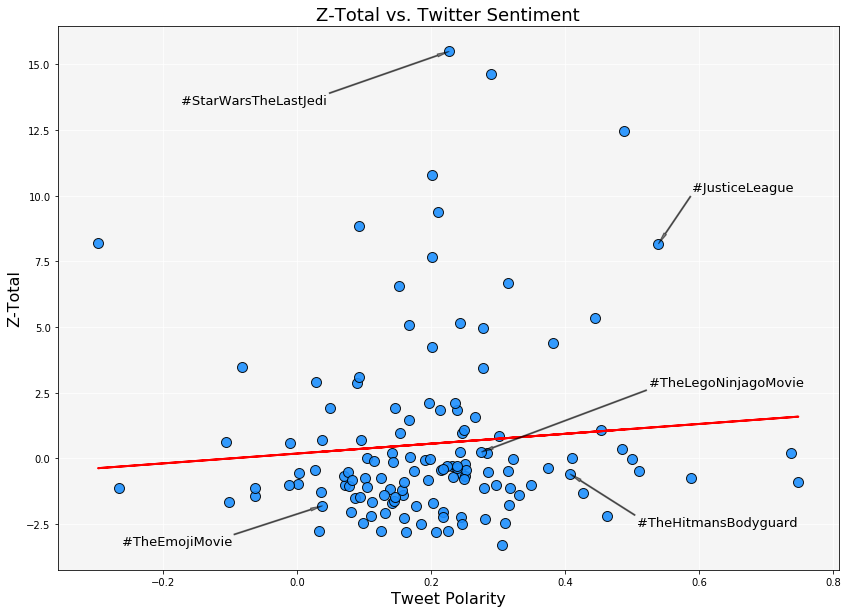

In [12]:
# Set axes
ztotal = movie_data_df['ztotal']
compound = movie_data_df['compound']

# Set movie coordinates
movie_list = ["#TheEmojiMovie", "#JusticeLeague", "#StarWarsTheLastJedi", 
              "#TheHitmansBodyguard", "#TheLegoNinjagoMovie"]

# Set figure size
plt.figure(figsize=(14, 10))

# Create trendline
zx = plt.subplot()
(zslope, zintercept, _, _, _) = stats.linregress(title_index_df['compound'], title_index_df['ztotal'])
zfit = (zslope * title_index_df['compound']) + zintercept
zx.plot(title_index_df['compound'], zfit, color = "r", linewidth = 2)
# z_df = pd.DataFrame({"slope":[zslope], "intercept":[zintercept]})

# Create plot
plt.scatter(compound, ztotal, marker="o", s=100, facecolor='dodgerblue', edgecolor='black', alpha=0.9)

# Set limits
# plt.xlim(-1, 1)

# Labels
plt.title('Z-Total vs. Twitter Sentiment', fontsize=18)
plt.xlabel('Tweet Polarity', fontsize=16)
plt.ylabel('Z-Total', fontsize=16)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Dictionary to hold coordinates for each movie
movie_coord = {}

# Grab coordinates
for movie in movie_list:
    
    # Pinpoint values for coordinates
    coordinate_values = title_index_df.loc[movie,['ztotal', 'compound']]
    
    # Assign coordinates
    x_coord = coordinate_values['compound']
    y_coord = coordinate_values['ztotal']
    
    # Add coordinates for each movie to dictionary
    movie_coord[movie] = [x_coord, y_coord]

# Annotations
ax.annotate("#TheEmojiMovie", xy=(movie_coord["#TheEmojiMovie"][0], movie_coord["#TheEmojiMovie"][1]), 
            xytext=(movie_coord["#TheEmojiMovie"][0]-0.3, movie_coord["#TheEmojiMovie"][1]-1.5), 
            fontsize=13, arrowprops=dict(facecolor='black', width=1, headwidth=3, shrink=.001, alpha=0.5))
ax.annotate("#JusticeLeague", xy=(movie_coord["#JusticeLeague"][0], movie_coord["#JusticeLeague"][1]), 
            xytext=(movie_coord["#JusticeLeague"][0]+0.05, movie_coord["#JusticeLeague"][1]+2), 
            fontsize=13, arrowprops=dict(facecolor='black', width=1, headwidth=3, shrink=.001, alpha=0.5))
ax.annotate("#StarWarsTheLastJedi", xy=(movie_coord["#StarWarsTheLastJedi"][0], movie_coord["#StarWarsTheLastJedi"][1]), 
            xytext=(movie_coord["#StarWarsTheLastJedi"][0]-0.4, movie_coord["#StarWarsTheLastJedi"][1]-2), 
            fontsize=13, arrowprops=dict(facecolor='black', width=1, headwidth=3, shrink=.001, alpha=0.5))
ax.annotate("#TheHitmansBodyguard", xy=(movie_coord["#TheHitmansBodyguard"][0], movie_coord["#TheHitmansBodyguard"][1]), 
            xytext=(movie_coord["#TheHitmansBodyguard"][0]+0.1, movie_coord["#TheHitmansBodyguard"][1]-2), 
            fontsize=13, arrowprops=dict(facecolor='black', width=1, headwidth=3, shrink=.001, alpha=0.5))
ax.annotate("#TheLegoNinjagoMovie", xy=(movie_coord["#TheLegoNinjagoMovie"][0], movie_coord["#TheLegoNinjagoMovie"][1]), 
            xytext=(movie_coord["#TheLegoNinjagoMovie"][0]+0.25, movie_coord["#TheLegoNinjagoMovie"][1]+2.5), 
            fontsize=13, arrowprops=dict(facecolor='black', width=1, headwidth=3, shrink=.001, alpha=0.5))

# Save and show
# plt.savefig('images/ztotal_vs_sentiment.png')
plt.show()